In [2]:
dat = read.table('eisen.txt', header=T, row.names=1, na.strings='NA', blank.lines.skip=F)
dat = as.data.frame(dat)
ann = read.table('eisenClasses.txt', header=T)
cl = as.character(ann[,2])
dat = dat[,cl]

In [3]:
dim(dat)

[1] 13412    39

In [4]:
gc = cl[1:19]
act = cl[20:39]

In [5]:
x = as.numeric(dat[8000,gc])
y = as.numeric(dat[8000,act])

In [6]:
x = x[!is.na(x)]
y = y[!is.na(y)]

In [7]:
xy.list = list(x, y)

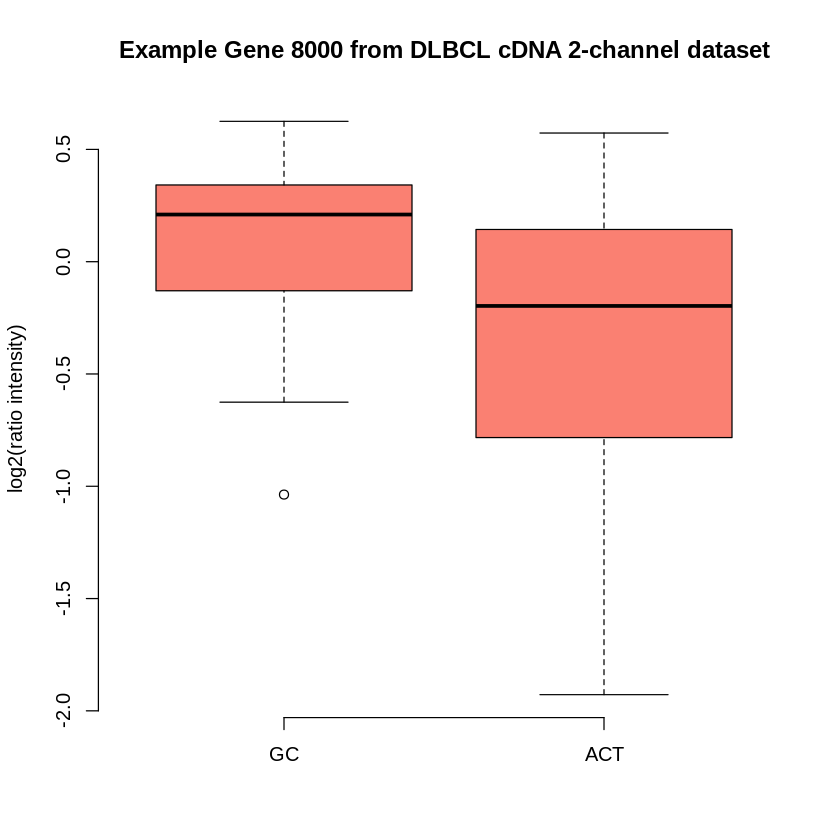

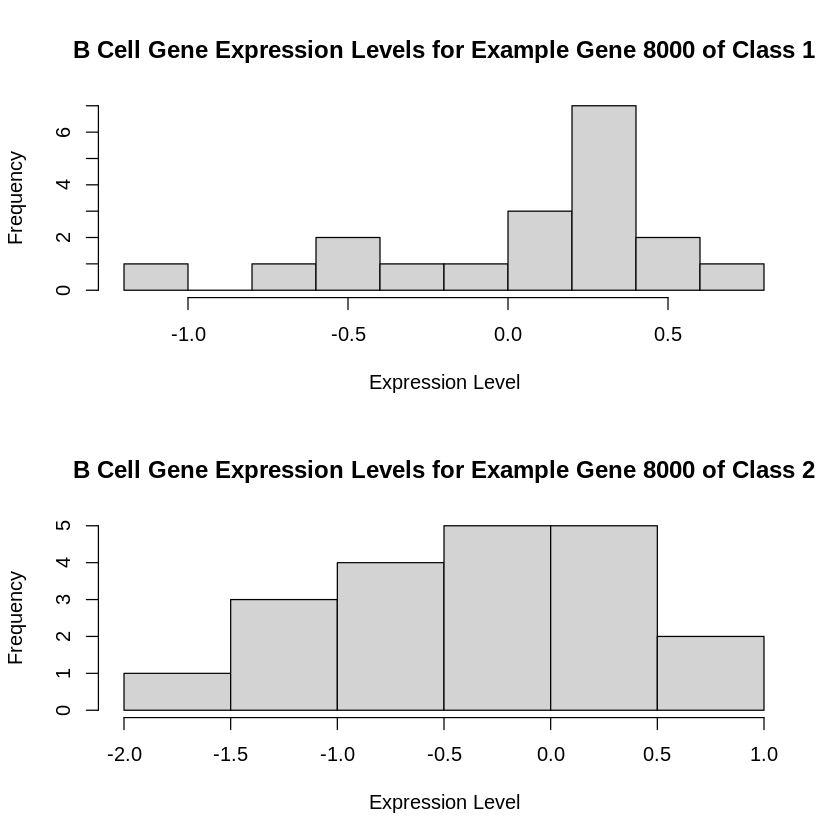

In [8]:
boxplot(xy.list, col='salmon', main='Example Gene 8000 from DLBCL cDNA 2-channel dataset',
        axes=F, ylab="log2(ratio intensity)")
axis(2)
axis(1,at=c(1,2),c("GC","ACT"))

par(mfrow=c(2,1))

hist(x, xlab="Expression Level", main="B Cell Gene Expression Levels for Example Gene 8000 of Class 1")
hist(y, xlab="Expression Level", main="B Cell Gene Expression Levels for Example Gene 8000 of Class 2")

In [9]:
xy.ttest = t.test(x, y, alternative ="two.sided", paired = FALSE, var.equal = FALSE, conf.level = 0.95)

In [10]:
nx = length(x)
ny = length(y)

In [11]:
pool.var = (((nx-1)*var(x)) + ((ny-1)*var(y)))/(nx+ny-2)

In [12]:
dif = abs(mean(x)-mean(y))/sqrt(pool.var)

In [13]:
install.packages('pwr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
library(pwr)

In [23]:
# 7)

dif.3fold = log2(3) / sqrt(pool.var)
pl.ss3 = pwr.t.test(d=dif.3fold, sig.level = 0.01, power=0.8, type='two.sample')
print(dif.3fold)
print(pl.ss3)

[1] 2.750686

     Two-sample t test power calculation 

              n = 4.986533
              d = 2.750686
      sig.level = 0.01
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group



In [ ]:
if(!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("ssize")

In [26]:
# install.packages('gdata')

In [27]:
library(ssize)
library(gdata)

In [18]:
# data(exp.sd) 

In [35]:
sds = apply(dat, 1, sd, na.rm=T)

In [38]:
# sds

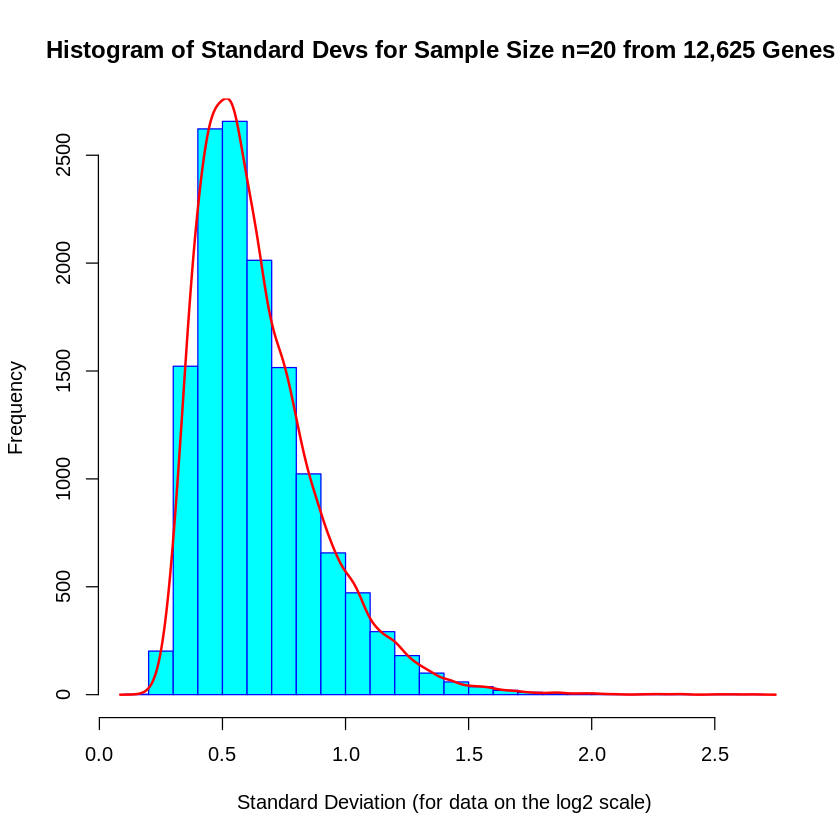

In [46]:
hist(sds,n=20, col="cyan", border="blue", main="",
     xlab="Standard Deviation (for data on the log2 scale)")
dens = density(sds)
lines(dens$x, dens$y*par('usr')[4]/max(dens$y), col='red', lwd = 2)
title('Histogram of Standard Devs for Sample Size n=20 from 12,625 Genes ') 

In [40]:
length(sds)

[1] 13412

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

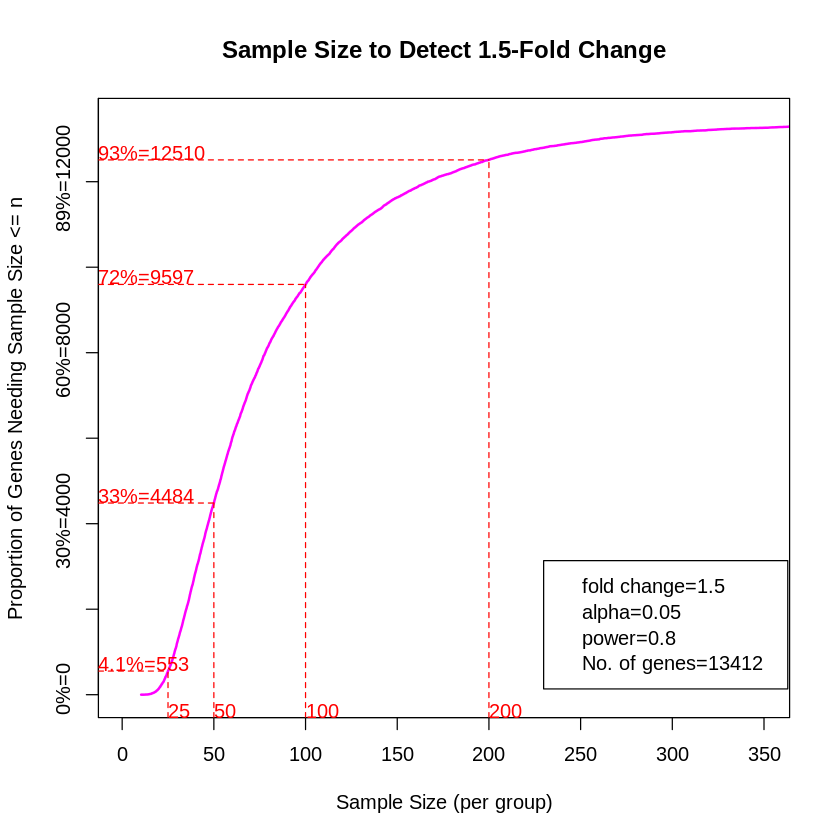

In [45]:
#  9)

n=6; fold.change=1.5; power=0.8; sig.level=0.05; 
all.size = ssize(sd=sds, delta=log2(fold.change), sig.level=sig.level, power=power)
ssize.plot(all.size, lwd=2, col="magenta",
           marks = c(25, 50, 100,200), xlim=c(1,350))
xmax = par("usr")[2]-1;
ymin = par("usr")[3] + 0.05
legend(x=xmax, y=ymin,
       legend= strsplit( paste("fold change=",fold.change,",", "alpha=", sig.level, ",", "power=",
       power,",", "No. of genes=", length(sds), sep=''), "," )[[1]], xjust=1, yjust=0, cex=1.0)
title("Sample Size to Detect 1.5-Fold Change")